In [1]:
SHOW_PLOT_FLAG = True

In [2]:
import sys

sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from constants import *
import matplotlib.gridspec as gridspec


## Loading Tput Data

In [3]:
tput_O_Sp90 = pd.read_csv('CuratedData/Tput_O_Sp_90Mhz.txt', sep='\t')
tput_O_Sp100 = pd.read_csv('CuratedData/Tput_O_Sp_100Mhz.txt', sep='\t')
tput_V_Sp90 = pd.read_csv('CuratedData/Tput_V_Sp_90Mhz.txt', sep='\t')
tput_V_It90 = pd.read_csv('CuratedData/Tput_V_It_90Mhz.txt', sep='\t')
y = 'Tput(Mbps)'

## Compute Tput Variability and Saving the processed files

In [4]:
cdfList = [tput_O_Sp90, tput_O_Sp100, tput_V_Sp90, tput_V_It90]
chunkList = [i for i in range(0, 21, 1)]
cols = [y]
allDFs = {}
for df in cdfList:
    cfg = df['config'].unique()[0]
    allDFs[cfg] = []
    for chk in chunkList:
        allDFs[cfg].append([chk*100] + V_t(df, chk).tolist())
cdfList = []
for c, lst in allDFs.items():
    tmpDF = pd.DataFrame(lst, columns=['time(ms)']+cols)
    tmpDF['config'] = c
    if not os.path.exists('{}'.format('Data-Processed')):
        os.makedirs('{}'.format('Data-Processed'))
    tmpDF.to_csv('Data-Processed/Tput_'+c+'.txt', sep='\t', index=False)
    cdfList.append(tmpDF)

/home/umn-networking/Desktop/5G-Mid-Band/Sec5-Channel-Variability/../utils.py:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  smoothed_data = df.groupby(df.index // window).mean()
/home/umn-networking/Desktop/5G-Mid-Band/Sec5-Channel-Variability/../utils.py:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  smoothed_data = df.groupby(df.index // window).mean()
/home/umn-networking/Desktop/5G-Mid-Band/Sec5-Channel-Variability/../utils.py:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric

In [5]:
flag = ['O_Sp_100Mhz', 'O_Sp_90Mhz', 'V_Sp_90Mhz','V_It_90Mhz']
newColors = {
    flag[0]: '#808000',
    flag[1]: '#469990',
    flag[2]: '#000075',
    flag[3]: '#f58231'
}
newMARKERS = {
    flag[0]: '^',
    flag[1]: 'X',
    flag[2]: '1',
    flag[3]: 'd',
}

## Plotting Tput Variability Results


O_Sp_90Mhz-->Tput(Mbps) mean is: 68.42513760808882 variance3.3165323800008677

O_Sp_100Mhz-->Tput(Mbps) mean is: 63.94478838964615 variance16.822852658860143

V_Sp_90Mhz-->Tput(Mbps) mean is: 65.23917342065496 variance3.5003822396123137

V_It_90Mhz-->Tput(Mbps) mean is: 39.16834354617896 variance7.319818832721118
Showing Plot  Sec5_Tput_V(t)_Fig12


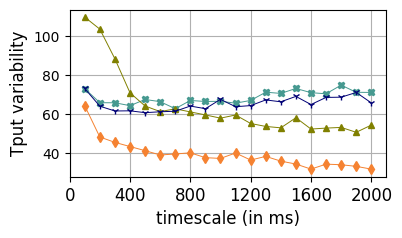

In [6]:
fig = plt.figure(figsize=(4, 2.2))
gs1 = gridspec.GridSpec(1, 1, wspace=0.4, hspace=0.5, top=.99, bottom=0.23, left=0.2, right=0.99, figure=fig)

c = 'config'
x = 'time(ms)'
ax = plt.subplot(gs1[0])
ax.yaxis.grid(True, which='major')
ax.xaxis.grid(True, which='major')

for ct in range(len(cdfList)):
    df = cdfList[ct]
    print('\n' + df[c].unique()[0] + '-->' + y +' mean is: ' + str(df[y].mean())  + ' variance' + str(df[y].std()))
    m = df[c].unique()[0]
    ax.plot(df[x], df[y], color=newColors[m], label=m, linewidth=0.7, marker=newMARKERS[m], ms=5)
ax.set_xticks([i*100 for i in range(0, 21, 4)])
ax.set_xticklabels([i*100 for i in range(0, 21, 4)], fontsize=12)


ax.set_xlabel('timescale (in ms)', fontsize=12)
ax.set_ylabel('Tput' + ' variability', fontsize=12)

#### Showing plots
plot_name = 'Fig12'
plotme(plt, " Sec5_Tput_V(t)", plot_name, show_flag=SHOW_PLOT_FLAG)
plt.close(fig)


## Loading MCS Data

In [7]:
mcs_O_Sp90 = pd.read_csv('CuratedData/MCS_O_Sp_90Mhz.txt', sep='\t')
mcs_O_Sp100 = pd.read_csv('CuratedData/MCS_O_Sp_100Mhz.txt', sep='\t')
mcs_V_Sp90 = pd.read_csv('CuratedData/MCS_V_Sp_90Mhz.txt', sep='\t')
mcs_V_It90 = pd.read_csv('CuratedData/MCS_V_It_90Mhz.txt', sep='\t')
y = 'MCS'

## Compute MCS Variability and Saving the processed files

In [8]:
cdfList = [mcs_O_Sp90, mcs_O_Sp100, mcs_V_Sp90, mcs_V_It90]
chunkList = [2**i for i in range(0, 31, 1)]
cols = [y]
allDFs = {}
for df in cdfList:
    cfg = df['config'].unique()[0]
    allDFs[cfg] = []
    for chk in chunkList:
        allDFs[cfg].append([chk] + V_t(df, chk).tolist())
cdfList = []
for c, lst in allDFs.items():
    tmpDF = pd.DataFrame(lst, columns=['time(ms)']+cols)
    tmpDF['config'] = c
    if not os.path.exists('{}'.format('Data-Processed')):
        os.makedirs('{}'.format('Data-Processed'))
    tmpDF.to_csv('Data-Processed/MCS_'+c+'.txt', sep='\t', index=False)
    cdfList.append(tmpDF)

/home/umn-networking/Desktop/5G-Mid-Band/Sec5-Channel-Variability/../utils.py:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  smoothed_data = df.groupby(df.index // window).mean()
/home/umn-networking/Desktop/5G-Mid-Band/Sec5-Channel-Variability/../utils.py:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  smoothed_data = df.groupby(df.index // window).mean()
/home/umn-networking/Desktop/5G-Mid-Band/Sec5-Channel-Variability/../utils.py:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric

## Plotting MCS Variability Results


O_Sp_90Mhz-->MCS mean is: 1.5850895513928753 variance0.6815363224224263

O_Sp_100Mhz-->MCS mean is: 1.8605352071614438 variance0.7825445549951594

V_Sp_90Mhz-->MCS mean is: 1.5754329905724298 variance0.7446987952158289

V_It_90Mhz-->MCS mean is: 0.9805504235680507 variance0.6330777260573395
Showing Plot  Sec5_MCS_V(t)_Fig12


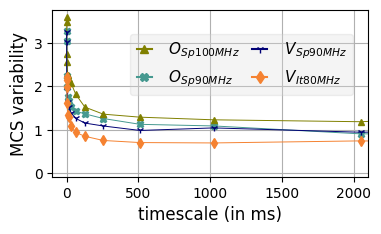

In [9]:
fig = plt.figure(figsize=(4, 2.2))
gs1 = gridspec.GridSpec(1, 1, wspace=0.4, hspace=0.5, top=.99, bottom=0.23, left=0.2, right=0.99, figure=fig)

c = 'config'
time = 'time(ms)'
ax = plt.subplot(gs1[0])
ax.yaxis.grid(True, which='major')
ax.xaxis.grid(True, which='major')
x = 'chunk (ms)'

for ct in range(len(cdfList)):
    df = cdfList[ct]
    df['chunk (ms)'] = df[time] * 0.5 
    print('\n' + df[c].unique()[0] + '-->' + y +' mean is: ' + str(df[y].mean())  + ' variance' + str(df[y].std()))
    m = df[c].unique()[0]
    ax.plot(df[x], df[y], color=newColors[m], label=m, linewidth=0.7, marker=newMARKERS[m], ms=5)


# -----> Plot legend
h1, = plt.plot(-6000, 0.1, color=newColors[flag[0]], marker=newMARKERS[flag[0]])
h2, = plt.plot(-8000, 0.11,  color=newColors[flag[1]], marker=newMARKERS[flag[1]])
h3, = plt.plot(-8000, 0.11, color=newColors[flag[2]], marker=newMARKERS[flag[2]])
h4, = plt.plot(-8000, .11, color=newColors[flag[3]], marker=newMARKERS[flag[3]])

legend1 = ax.legend((h1, h2, h3,h4), (' $O_{Sp 100MHz}$', ' $O_{Sp 90MHz}$', ' $V_{Sp 90MHz}$', ' $V_{It 80MHz}$'),
                    loc='upper center', ncol=2, columnspacing=0.8,
                    bbox_to_anchor=(0.6, 0.9), facecolor='#dddddd',
                    handlelength=1, framealpha=.3, fontsize = 11, markerscale=1)

ax.set_xlim(-100, 2100)

ax.set_xlabel('timescale (in ms)', fontsize=12)
ax.set_ylabel('MCS' + ' variability', fontsize=12)

#### Showing plots
plot_name = 'Fig12'
plotme(plt, " Sec5_MCS_V(t)", plot_name, show_flag=SHOW_PLOT_FLAG)
plt.close(fig)


## Loading MCS Data

In [10]:
mimo_O_Sp90 = pd.read_csv('CuratedData/MimoLayers_O_Sp_90Mhz.txt', sep='\t')
mimo_O_Sp100 = pd.read_csv('CuratedData/MimoLayers_O_Sp_100Mhz.txt', sep='\t')
mimo_V_Sp90 = pd.read_csv('CuratedData/MimoLayers_V_Sp_90Mhz.txt', sep='\t')
mimo_V_It90 = pd.read_csv('CuratedData/MimoLayers_V_It_90Mhz.txt', sep='\t')
y = 'MimoLayers'

## Compute MIMO Layers Variability and Saving the processed files

In [11]:
cdfList = [mimo_O_Sp90, mimo_O_Sp100, mimo_V_Sp90, mimo_V_It90]
chunkList = [i**2 for i in range(0, 64, 1)]
cols = [y]
allDFs = {}
for df in cdfList:
    cfg = df['config'].unique()[0]
    allDFs[cfg] = []
    for chk in chunkList:
        allDFs[cfg].append([chk] + V_t(df, chk).tolist())
cdfList = []
for c, lst in allDFs.items():
    tmpDF = pd.DataFrame(lst, columns=['time(ms)']+cols)
    tmpDF['config'] = c
    if not os.path.exists('{}'.format('Data-Processed')):
        os.makedirs('{}'.format('Data-Processed'))
    tmpDF.to_csv('Data-Processed/MCS_'+c+'.txt', sep='\t', index=False)
    cdfList.append(tmpDF)

/home/umn-networking/Desktop/5G-Mid-Band/Sec5-Channel-Variability/../utils.py:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  smoothed_data = df.groupby(df.index // window).mean()
/home/umn-networking/Desktop/5G-Mid-Band/Sec5-Channel-Variability/../utils.py:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  smoothed_data = df.groupby(df.index // window).mean()
/home/umn-networking/Desktop/5G-Mid-Band/Sec5-Channel-Variability/../utils.py:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric

## Plotting Mimo Layers variability Results


O_Sp_90Mhz-->MimoLayers mean is: 0.1268342797736744 variance0.021623215670142637

O_Sp_100Mhz-->MimoLayers mean is: 0.16659693363929767 variance0.029961937158946766

V_Sp_90Mhz-->MimoLayers mean is: 0.11115026420199338 variance0.011130707399327896

V_It_90Mhz-->MimoLayers mean is: 0.018357850452638096 variance0.0025325169648581698
Showing Plot  Sec5_layers_V(t)_Fig12


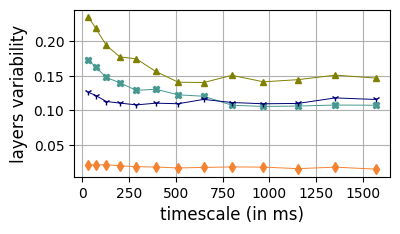

In [12]:
fig = plt.figure(figsize=(4, 2.2))
gs1 = gridspec.GridSpec(1, 1, wspace=0.4, hspace=0.5, top=.99, bottom=0.23, left=0.2, right=0.99, figure=fig)

c = 'config'
time = 'time(ms)'
ax = plt.subplot(gs1[0])
ax.yaxis.grid(True, which='major')
ax.xaxis.grid(True, which='major')
x = 'chunk (ms)'

for ct in range(len(cdfList)):
    df = cdfList[ct]
    df['chunk (ms)'] = df[time] * 0.5 
    df = df.iloc[[j for j in range(0, 60, 4)]]
    print('\n' + df[c].unique()[0] + '-->' + y +' mean is: ' + str(df[y].mean())  + ' variance' + str(df[y].std()))
    m = df[c].unique()[0]
    ax.plot(df[2:][x], df[2:][y], color=newColors[m], label=m, linewidth=0.7, marker=newMARKERS[m], ms=5)


ax.set_xlabel('timescale (in ms)', fontsize=12)
ax.set_ylabel('layers' + ' variability', fontsize=12)

#### Showing plots
plot_name = 'Fig12'
plotme(plt, " Sec5_layers_V(t)", plot_name, show_flag=SHOW_PLOT_FLAG)
plt.close(fig)
